In [53]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpl
from scipy.signal import find_peaks
import datetime as dt

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro

In [2]:
from sp500_variables import sp500_dict, sp500_all
from utils import Say, now_date
from cleaning import cleaning

say = Say()

In [16]:
def get_data(name, start='2021-01-01'):
    return yf.download(name,period="max", start=start, rounding=2)

def get_variaciones(df):
    variaciones = df.Close.pct_change()

    return variaciones

def get_volatilidad(df):
    var = get_variaciones(df)
    volatilidad = var.rolling(250).std()*100*(250)**0.5

    return volatilidad

def find_peak(df):
    vol = get_volatilidad(df)
    peaks, _ = find_peaks(vol, prominence=3)
    return peaks, vol

def retornos_gap(df):
    return np.log(df.Open/df.Close.shift(1)).fillna(0)   

def retornos_intra(df):
    return np.log(df['Close']/df.Open).fillna(0) 
    

In [4]:
labels = cleaning()
data_dict = sp500_dict(labels)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
apple = get_data('AAPL','2022-1-1')


[*********************100%***********************]  1 of 1 completed


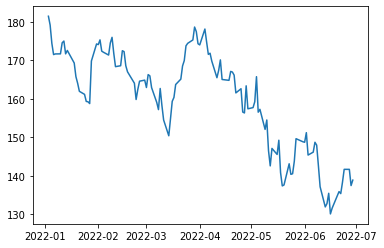

In [56]:
plt.plot(apple['Adj Close'])

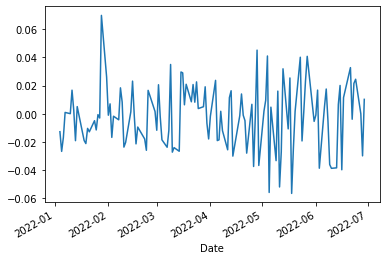

In [39]:
apple['Returns'] = apple['Adj Close'].pct_change()
apple.Returns.plot()
plt.show()

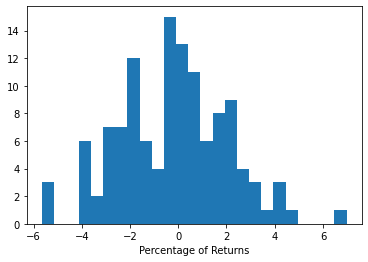

In [43]:
returns_percent = apple.Returns * 100
returns_percent.dropna(inplace=True)

plt.hist(returns_percent, bins=25)
plt.xlabel("Percentage of Returns")
plt.show()

In [57]:

daily_mean_returns = np.mean(apple['Returns'])
print("Retorno Medio Diario: " + str(round(daily_mean_returns, 3))+' % ')

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Retorno Medio Anual: " + str(round(annual_mean_returns, 3))+' % ')

Retorno Medio Diario: -0.002 % 
Retorno Medio Anual: -0.387 % 


In [54]:
returns = apple['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: 0.07210789093345649


In [55]:
excess_kurtosis = kurtosis(returns)
print("Excess kurtosis: " + str(excess_kurtosis))

real_kurtosis = excess_kurtosis + 3
print("Real kurtosis: " + str(real_kurtosis))

Excess kurtosis: 0.07878114867586472
Real kurtosis: 3.0787811486758647
